In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
# model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# evaluate models using R-squared and mean squared error
from sklearn import metrics

# visualise performance
import matplotlib.pyplot as plt

In [ ]:
#read data
insurance_data = pd.read_csv("data/insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Data Normalizing**

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_data.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
print(insurance_data['sex'].unique())
print(insurance_data['smoker'].unique())
print(insurance_data['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
insurance_data['sex'] = insurance_data['sex'].map({'female':0, 'male':1})
insurance_data['smoker'] = insurance_data['smoker'].map({'no':0, 'yes':1})
insurance_data['region'] = insurance_data['region'].map({'southwest':1, 'southeast':2,
                                     'northwest':3, 'northeast':4})

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [ ]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# **Model Building**

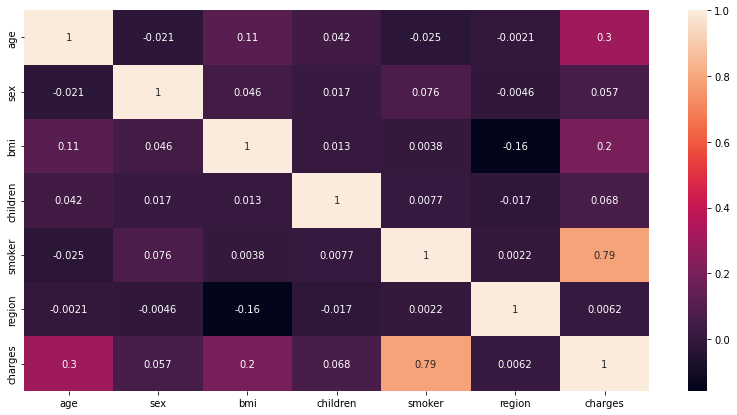

In [ ]:
plt.figure(figsize=(14, 7))

corr_matrix = insurance_data.corr()

sns.heatmap(corr_matrix, annot=True)

plt.show()

In [ ]:
# split dataset
X = insurance_data.drop(['charges'], axis = 1)
y = insurance_data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

In [ ]:
# fit data to model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

# **Model Evaluate**

In [ ]:
df1 = pd.DataFrame({'Actual':y_test, 'Lr':y_pred})
df1

,Actual,Lr
1034,12950.07120,15890.374720
1206,36910.60803,14650.826493
519,3857.75925,6211.315526
174,2855.43755,5228.805905
71,6799.45800,7333.758809
...,...,...
101,3645.08940,4179.696526
1262,6770.19250,7832.991788
1178,2899.48935,5754.445230
560,9193.83850,7070.147248


In [ ]:
r2 = metrics.r2_score(y_test, y_pred)   # linear regression
r2 = r2*100

mse = metrics.mean_squared_error(y_test, y_pred)   # linear regression

rmse = np.sqrt(mse)


print(f'Percent of r2_score is {r2}%')
print(f'Mean Squared Error is {mse}')
print(f'Root Mean Squared Error is {rmse}')

Percent of r2_score is 73.15462085856305%
Mean Squared Error is 39515584.74227572
Root Mean Squared Error is 6286.142278239948


# **MSE without Sklearn**

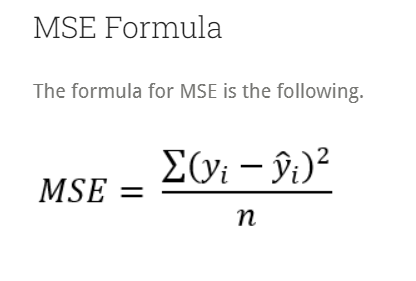

In [ ]:
df1['Subtract'] = df1['Actual'] - df1['Lr']
mse_y = 0
for i in df1['Subtract']:
  mse_y += i**2
mse = mse_y/len(df1['Subtract'])
print('Mean Squared Error without sklearn:',mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error without sklearn:',rmse)

Mean Squared Error without sklearn: 39515584.74227572
Root Mean Squared Error without sklearn: 6286.142278239948


**Visual**

In [ ]:
min_value = df1['Actual'].min()
max_value = df1['Actual'].max()

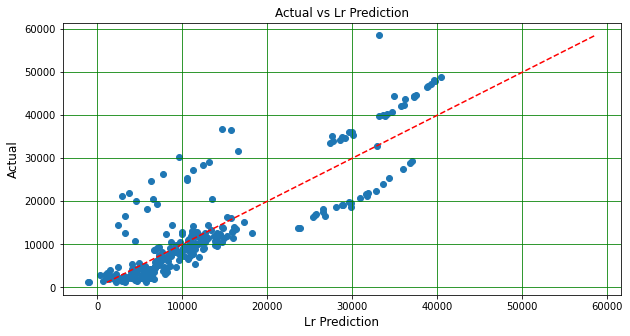

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df1['Lr'], df1['Actual'])
plt.plot([min_value, max_value], [min_value, max_value], linestyle='--', color='red')
# Add labels and title
plt.ylabel("Actual", fontsize = 12)
plt.xlabel("Lr Prediction", fontsize =12)
plt.title("Actual vs Lr Prediction")
# Show the plot
plt.grid(True, color = 'green')
plt.show()


**Predict with new data**

In [ ]:
new_data = {'age':40,
       'sex':1,
       'bmi':40.30,
       'children':4,
       'smoker':1,
       'region':2}

new_patient = pd.DataFrame(new_data, index = [0])
print(new_patient)

   age  sex   bmi  children  smoker  region
0   40    1  40.3         4       1       2


In [ ]:
new_patient_pred1 = lr.predict(new_patient)
print('Charges of new patient is:',new_patient_pred1[0])

Charges of new patient is: 36504.85345603181


# **Gradient Descent**

In [ ]:
# Define the learning rate and number of iterations for gradient descent
alpha = 0.0001
num_iters = 150000

X = insurance_data.drop('charges', axis=1)
Y = insurance_data['charges']

# Add a column of ones to X to represent the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialize the weights for the linear regression model with small random values
weights = np.random.randn(X.shape[1]) * 0.01

# Define the mean squared error loss function
def mse_loss(X, Y, weights):
    predictions = np.dot(X, weights)
    errors = Y - predictions
    squared_errors = errors ** 2
    return np.mean(squared_errors)

# Define the gradient of the mean squared error loss function
def mse_grad(X, Y, weights):
    predictions = np.dot(X, weights)
    errors = Y - predictions
    grad = -2 * np.mean(errors.values.reshape(-1, 1) * X, axis=0)
    return grad

# Perform gradient descent to optimize the weights
for i in range(num_iters):
    # Calculate the gradient of the loss function
    grad = mse_grad(X, Y, weights)

    # Update the weights using the gradient and learning rate
    weights -= alpha * grad

    # Print the current loss every 1000 iterations
    if i % 10000 == 0:
        print("Iteration {}, Loss: {}".format(i, mse_loss(X, Y, weights)))
print("Weights: {}".format(weights))


Iteration 0, Loss: 173691739.69887197
Iteration 10000, Loss: 87076165.02418193
Iteration 20000, Loss: 64510528.15190206
Iteration 30000, Loss: 52631031.55280297
Iteration 40000, Loss: 46299535.38444484
Iteration 50000, Loss: 42867289.72701676
Iteration 60000, Loss: 40959647.935210854
Iteration 70000, Loss: 39859671.42884395
Iteration 80000, Loss: 39191937.75227088
Iteration 90000, Loss: 38759107.770476
Iteration 100000, Loss: 38456994.84463526
Iteration 110000, Loss: 38230260.97575514
Iteration 120000, Loss: 38049243.37588861
Iteration 130000, Loss: 37897809.48892378
Iteration 140000, Loss: 37766982.03289387
Weights: [-6366.4741666    231.70211542  -374.20092368   194.35506468
   373.81236171 23419.06755784  -105.55489179]


# **Simple regression model**

In [ ]:
X = insurance_data.drop(['charges','children','region','sex','age','bmi'], axis = 1)
y = insurance_data['charges']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

#use and fit data to model
lr = LinearRegression()
lr.fit(X_train, y_train)

#predict
y_pred = lr.predict(X_test)

r2 = metrics.r2_score(y_test, y_pred)   # linear regression
r2 = r2*100

mse = metrics.mean_squared_error(y_test, y_pred)   # linear regression

rmse = np.sqrt(mse)


print(f'Percent of r2_score is {r2}%')
print(f'Mean Squared Error is {mse}')
print(f'Root Mean Squared Error is {rmse}')

Percent of r2_score is 57.362143871427484%
Mean Squared Error is 62761632.39121168
Root Mean Squared Error is 7922.223954876034


In [ ]:
df2 = pd.DataFrame({'Actual':y_test, 'Lr':y_pred})

**Check with the input in the previous example**

In [ ]:
new_data = {'smoker':1}

new_patient = pd.DataFrame(new_data, index = [0])
new_patient_pred2 = lr.predict(new_patient)
print('Charges of new patient is:',new_patient_pred2[0])

Charges of new patient is: 32105.99597235294


# **Visualization to compare Multi and Simple LR**

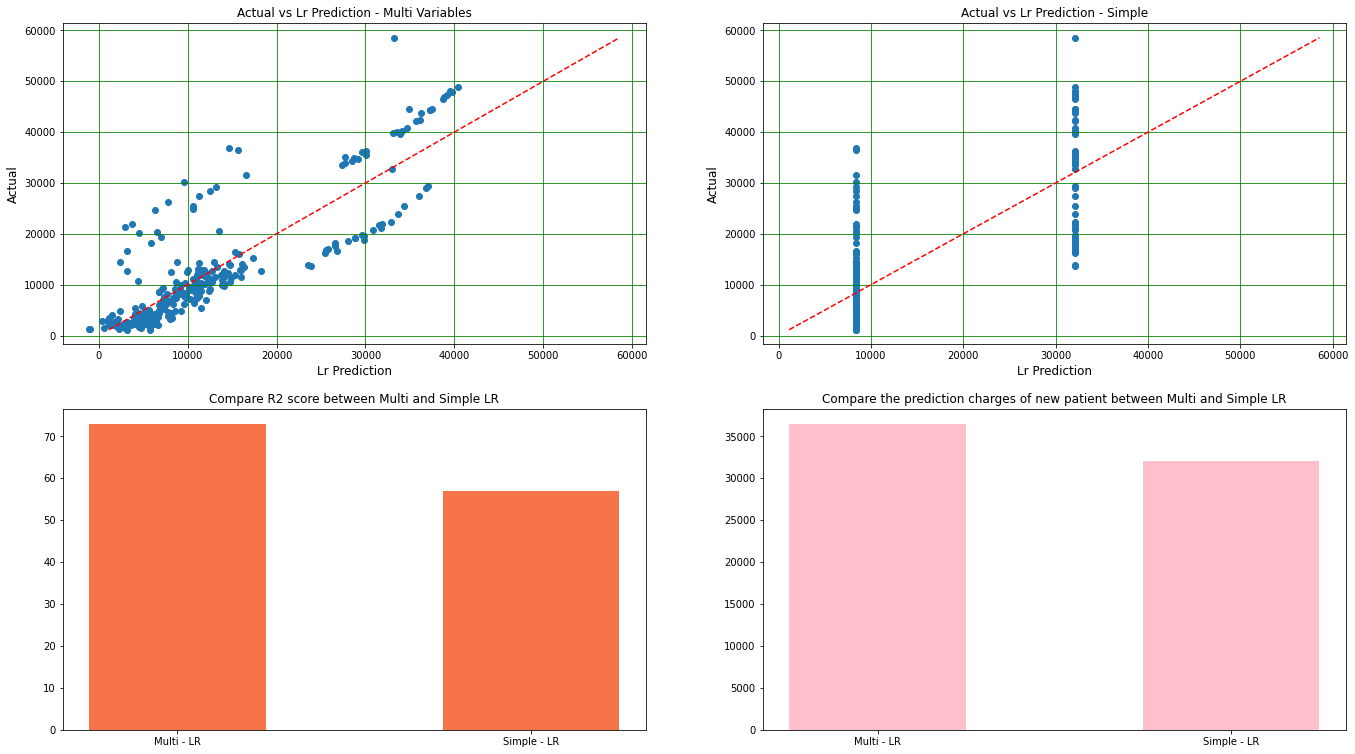

In [ ]:
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (23,13))

# creat chart
ax1.scatter(df1['Lr'], df1['Actual'])
ax1.plot([min_value, max_value], [min_value, max_value], linestyle='--', color='red')

ax2.scatter(df2['Lr'], df2['Actual'])
ax2.plot([min_value, max_value], [min_value, max_value], linestyle='--', color='red')

x3 = ['Multi - LR','Simple - LR']
y3 = [73,57]
ax3.bar(x3,y3, width = 0.5, color = '#F7744A')

x4 = ['Multi - LR','Simple - LR']
y4 = [36504.853456031815,32105.99597235295]
ax4.bar(x4,y4, width = 0.5, color = 'pink')

#set label
ax1.set_ylabel("Actual", fontsize = 12)
ax1.set_xlabel("Lr Prediction", fontsize =12)
ax1.set_title("Actual vs Lr Prediction - Multi Variables")

ax2.set_ylabel("Actual", fontsize = 12)
ax2.set_xlabel("Lr Prediction", fontsize =12)
ax2.set_title("Actual vs Lr Prediction - Simple")

ax3.set_title("Compare R2 score between Multi and Simple LR")

ax4.set_title('Compare the prediction charges of new patient between Multi and Simple LR')

# css chart
ax1.grid(True, color = 'green')

ax2.grid(True, color = 'green')

# **Not use sklearn**

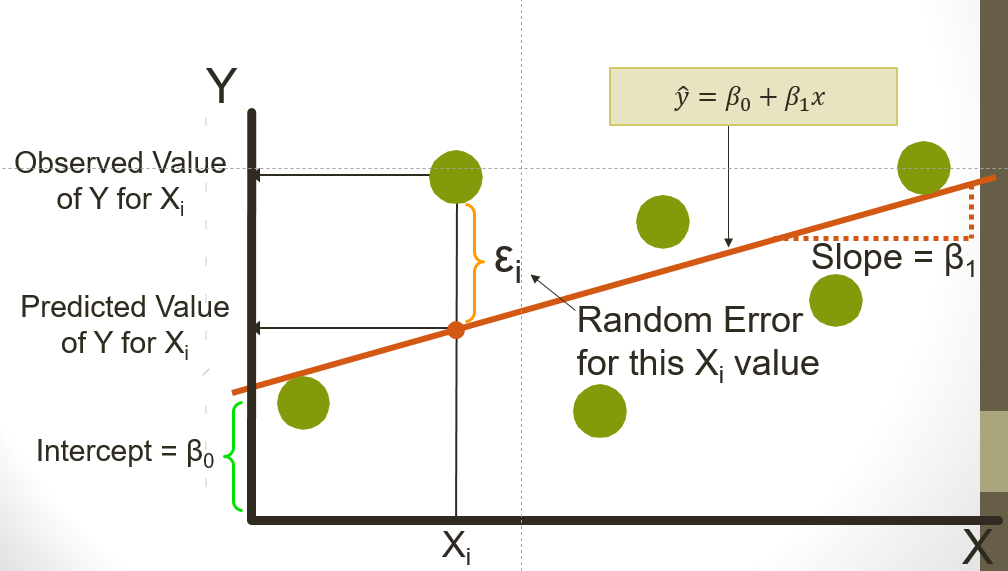

Trong toán học của hồi quy tuyến tính, "Sxx" đề cập đến tổng bình phương của sự khác biệt giữa mỗi giá trị x với giá trị trung bình của x. "Sxy" là tổng tích vô hướng của sự khác biệt giữa mỗi giá trị x và giá trị trung bình của x nhân với sự khác biệt tương ứng giữa mỗi giá trị y và giá trị trung bình của y. Đây là hai thuật ngữ quan trọng trong hồi quy tuyến tính.

Cụ thể, công thức cho độ dốc của đường hồi quy (b) được tính như sau:

b = Sxy / Sxx

 <=> b = Σ((xi - x_mean) * (yi - y_mean)) / Σ(xi - x_mean)^2

In [ ]:
#Calculated b = bias = intercept
# formula in math: w = Sxy/Sxx

#calculated Sxx (Sxx = sigma(x - sample_mean(x))^2)

sample_smoker = insurance_data['smoker'].sum()/len(insurance_data['smoker'])
sample_charges = insurance_data['charges'].sum()/len(insurance_data['smoker'])
Sxx = 0
for s in insurance_data['smoker']:
    Sxx += (s - sample_smoker)**2
print(Sxx)

217.88938714499642


In [ ]:
#calculated Sxy (Sxy = sigma(xiyi) - [(sigma(x)*sigma(y))/n])

# calculated sigma(xiyi)
insurance_data['Result'] = insurance_data['smoker'].mul(insurance_data['charges'])
sigma_xy = insurance_data['Result'].sum()

# calculated sigma(x)*sigma(y))/n
sum_smoker = insurance_data['smoker'].sum()
sum_charges = insurance_data['charges'].sum()
sigma_xyn = (sum_smoker*sum_charges)/len(insurance_data['smoker'])

Sxy = sigma_xy - sigma_xyn
print('Sxy is:', Sxy)

Sxy is: 5145667.821191296


In [ ]:
w1 = Sxy/Sxx
print('coef_ is:', w1)

coef_ is: 23615.963533676222


In [ ]:
#calculated b = bias = intercept
# b = sample_mean y - w1*sample_mean x

b = sample_charges - w1*sample_smoker
print('Bias (intercept) is:',b)

Bias (intercept) is: 8434.268297856292


**Now is the predict with b and w is know**

In [ ]:
# formula of predict y in linear regression is: y_pred = b + w*x
y = b + w1*1
print('Charges of patient without sklearn:',y)
print('Charges of new patient with sklearn:',new_patient_pred2[0])

Charges of patient without sklearn: 32050.231831532514
Charges of new patient with sklearn: 32105.99597235294
